#0. Perceptron

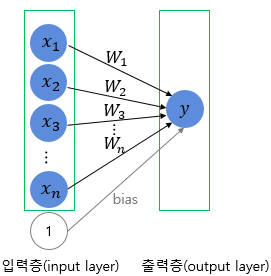

값을 보내는 단계과 값을 받아서 출력하는 두 단계로만 이루어집니다.    
이때 이 각 단계를 보통 층(layer)라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 합니다.     

#1. AND 연산

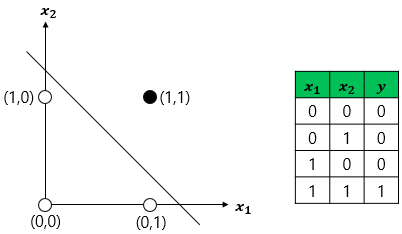

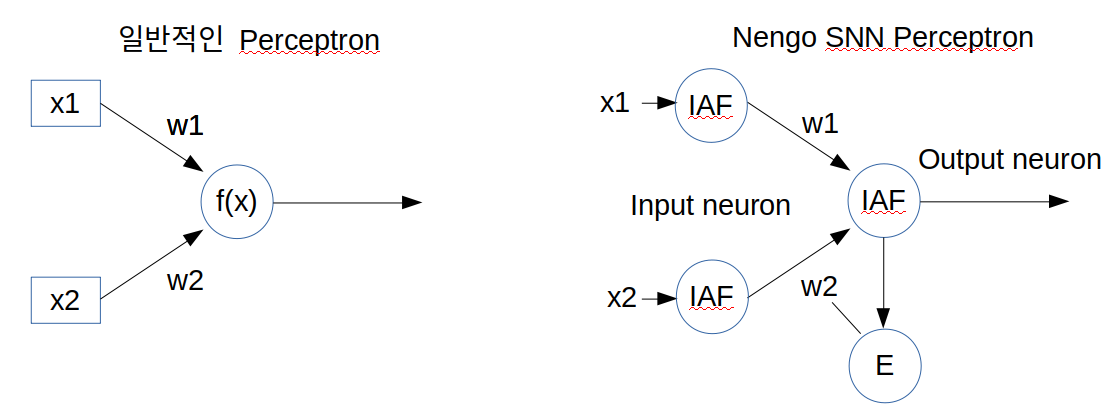

일반적인 perceptron과 달리, Nengo는 발화를 기반으로 하기 때문에,
입력된 값에 대한 정보를 spike로써 representation하는 input neuron이 요구됩니다.
Weight변화를 위해서는 PES learning을 사용하였습니다.

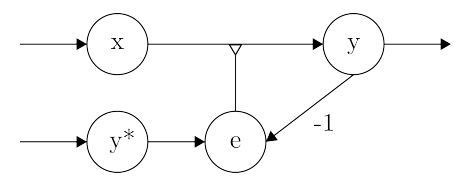

In [1]:
!pip install nengo

     |████████████████████████████████| 399kB 2.8MB/s 


In [9]:
%matplotlib inline
import nengo
from nengo.dists import Uniform
from nengo.utils.ensemble import response_curves, tuning_curves
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generateData(n, function):
    # n: iteration number
    inputs = []
    
    if function == "OR":
        for i in range(n):
            inputs.append([0,0,1,[0]])
            inputs.append([0,1,1,[1]])
            inputs.append([1,0,1,[1]])
            inputs.append([1,1,1,[1]])    
    elif function == "AND":
        for i in range(n):
            inputs.append([0,0,1,[0]])
            inputs.append([0,1,1,[0]])
            inputs.append([1,0,1,[0]])
            inputs.append([1,1,1,[1]]) 
    else:
        for i in range(n):
            inputs.append([0,0,1,[0]])
            inputs.append([0,1,1,[1]])
            inputs.append([1,0,1,[1]])
            inputs.append([1,1,1,[0]])
    return inputs

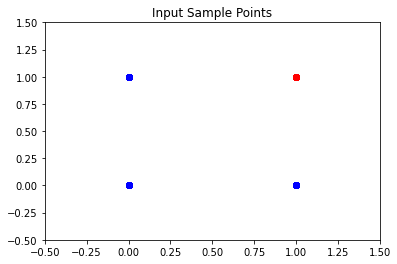

In [11]:
samples = 200
sets = int(samples / 4)
data = generateData(sets, "AND")

plt.figure()
plt.title("Input Sample Points")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
for x in data:
    if x[3][0] == 1:
        plt.plot(x[0], x[1], 'or')
    else:
        plt.plot(x[0], x[1], 'ob')

In [12]:
N = 30      # number of neurons
D_inp = 3
D_out = 1
sim_time = samples
neuron_mode = nengo.LIF() 
model = nengo.Network('AND Network')

weights = np.random.rand(D_inp,D_out).transpose()    

with model:  
    def stim(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return [data[i][0], data[i][1], data[i][2]]
        return 0
       
    def stim_ans(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return data[i][3]
        return 0 
      
    #Define perceptron inputs
    stim = nengo.Node(output=stim, size_out=D_inp)
    stim_ans = nengo.Node(output=stim_ans, size_out=D_out)

    #Create neural ensembles
    input = nengo.Ensemble(N*D_inp, dimensions=D_inp, neuron_type=neuron_mode, label="input") 
    answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="answer")  
    correct_answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="correct_answer")
    
    #Provide inputs to the perceptron
    nengo.Connection(stim, input) 
    nengo.Connection(stim_ans, correct_answer)
    
    #Compute error for learning which gets inhibited
    error = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="error")
    nengo.Connection(answer, error, transform=1)
    nengo.Connection(correct_answer, error, transform=-1)
    
    #Specify the learning rule and the weight solver
    conn = nengo.Connection(input, answer, transform=weights, solver=nengo.solvers.LstsqL2(weights=True)) 
    conn.learning_rule_type={'my_pes': nengo.PES(1e-4)}
    
    #Provide error for learning
    error_conn = nengo.Connection(error, conn.learning_rule['my_pes'])

In [13]:
with model:
    input_p = nengo.Probe(input, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)
    correct_answer_p = nengo.Probe(correct_answer, synapse=0.1)
    error_p = nengo.Probe(error, synapse=0.1)


In [14]:
sim = nengo.Simulator(model)
sim.run(sim_time)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0.5, 1.0, 'Error for learning')

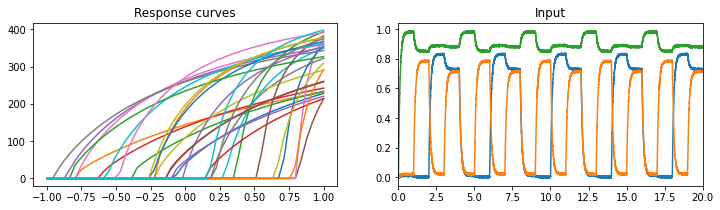

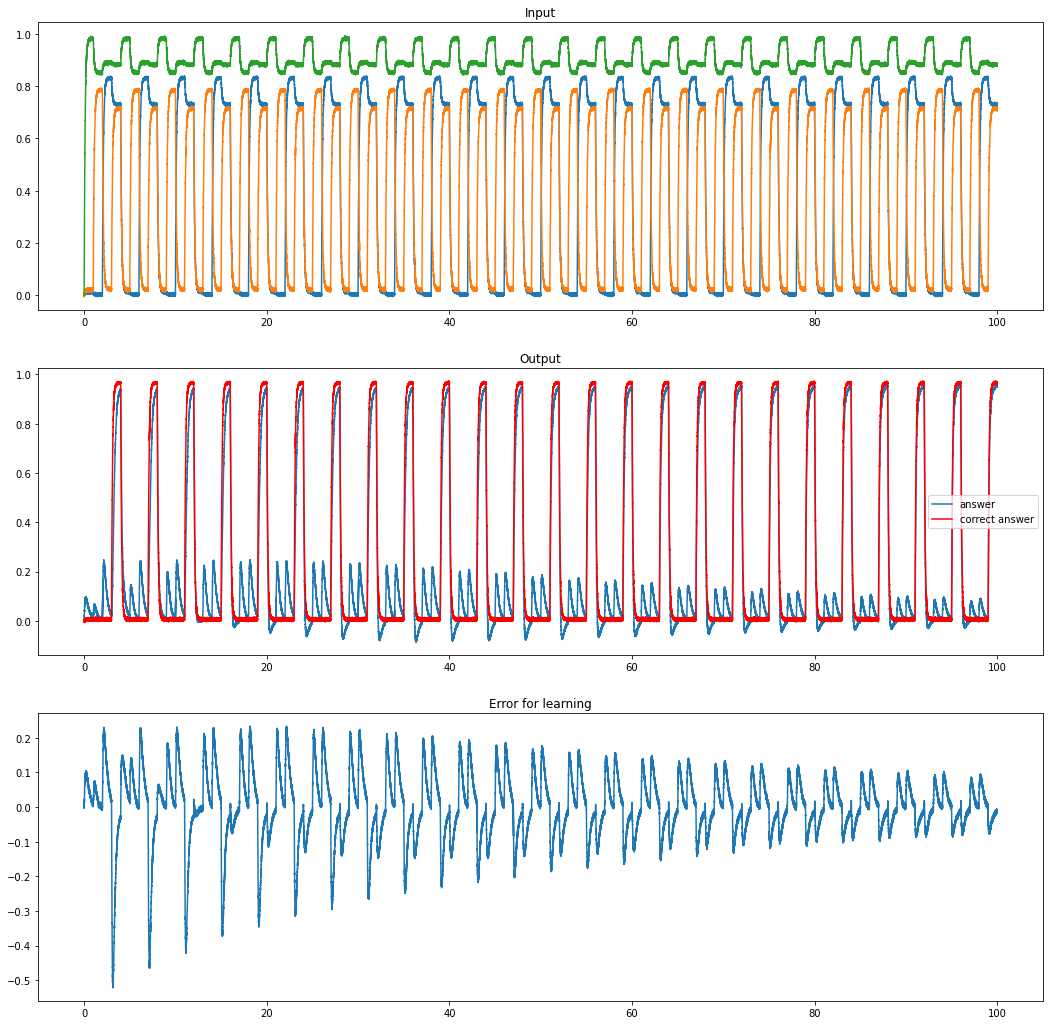

In [15]:
fig = plt.figure(figsize=(12, 3))
p0 = plt.subplot(1, 2, 1)
p0.plot(*response_curves(answer, sim))
p0.set_title("Response curves")

p1 = plt.subplot(1, 2, 2)
p1.plot(t, sim.data[input_p])
p1.set_title("Input")
p1.set_xlim(0,20)

fig = plt.figure(figsize=(18,18))

p0 = fig.add_subplot(3,1,1)
p0.plot(t, sim.data[input_p])
p0.set_title("Input")

p1 = fig.add_subplot(3,1,2)
p1.plot(t, sim.data[answer_p], label="answer")
p1.plot(t, sim.data[correct_answer_p], label="correct answer", color='r')
p1.set_title("Output")
p1.legend(loc='best');

p2 = fig.add_subplot(3,1,3)
p2.plot(t, sim.data[error_p])
p2.set_title("Error for learning")

#2. OR 연산

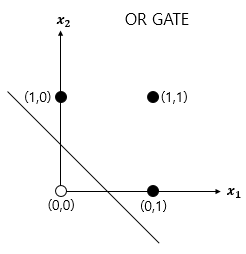

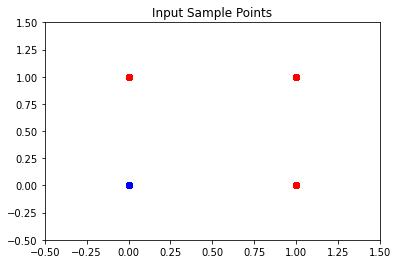

In [17]:
samples = 200
sets = int(samples / 4)
data = generateData(sets, "OR")

plt.figure()
plt.title("Input Sample Points")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
for x in data:
    if x[3][0] == 1:
        plt.plot(x[0], x[1], 'or')
    else:
        plt.plot(x[0], x[1], 'ob')

In [18]:
N = 30      # number of neurons
D_inp = 3
D_out = 1
sim_time = samples
neuron_mode = nengo.LIF() 
model = nengo.Network('OR Network')

weights = np.random.rand(D_inp,D_out).transpose()    

with model:  
    def stim(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return [data[i][0], data[i][1], data[i][2]]
        return 0
       
    def stim_ans(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return data[i][3]
        return 0 
      
    #Define perceptron inputs
    stim = nengo.Node(output=stim, size_out=D_inp)
    stim_ans = nengo.Node(output=stim_ans, size_out=D_out)

    #Create neural ensembles
    input = nengo.Ensemble(N*D_inp, dimensions=D_inp, neuron_type=neuron_mode, label="input") 
    answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="answer")  
    correct_answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="correct_answer")
    
    #Provide inputs to the perceptron
    nengo.Connection(stim, input) 
    nengo.Connection(stim_ans, correct_answer)
    
    #Compute error for learning which gets inhibited
    error = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="error")
    nengo.Connection(answer, error, transform=1)
    nengo.Connection(correct_answer, error, transform=-1)
    
    #Specify the learning rule and the weight solver
    conn = nengo.Connection(input, answer, transform=weights, solver=nengo.solvers.LstsqL2(weights=True)) 
    conn.learning_rule_type={'my_pes': nengo.PES(1e-4)}
    
    #Provide error for learning
    error_conn = nengo.Connection(error, conn.learning_rule['my_pes'])

In [19]:
with model:
    input_p = nengo.Probe(input, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)
    correct_answer_p = nengo.Probe(correct_answer, synapse=0.1)
    error_p = nengo.Probe(error, synapse=0.1)


In [20]:
sim = nengo.Simulator(model)
sim.run(sim_time)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0.5, 1.0, 'Error for learning')

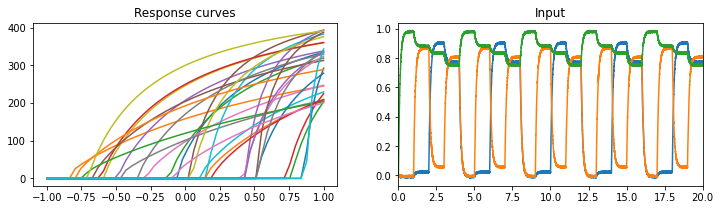

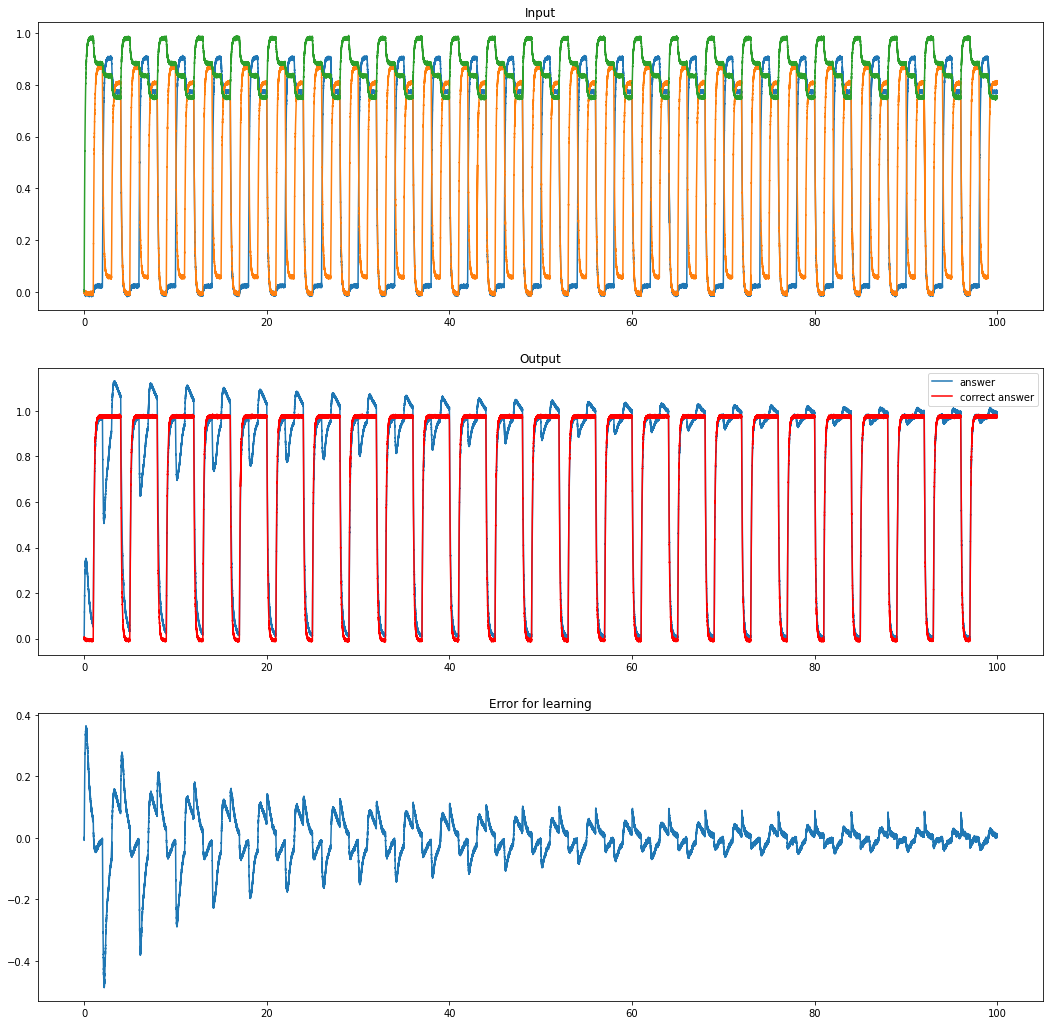

In [21]:
fig = plt.figure(figsize=(12, 3))
p0 = plt.subplot(1, 2, 1)
p0.plot(*response_curves(answer, sim))
p0.set_title("Response curves")

p1 = plt.subplot(1, 2, 2)
p1.plot(t, sim.data[input_p])
p1.set_title("Input")
p1.set_xlim(0,20)

fig = plt.figure(figsize=(18,18))

p0 = fig.add_subplot(3,1,1)
p0.plot(t, sim.data[input_p])
p0.set_title("Input")

p1 = fig.add_subplot(3,1,2)
p1.plot(t, sim.data[answer_p], label="answer")
p1.plot(t, sim.data[correct_answer_p], label="correct answer", color='r')
p1.set_title("Output")
p1.legend(loc='best');

p2 = fig.add_subplot(3,1,3)
p2.plot(t, sim.data[error_p])
p2.set_title("Error for learning")

# 3. XOR 연산

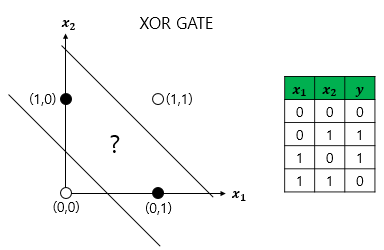

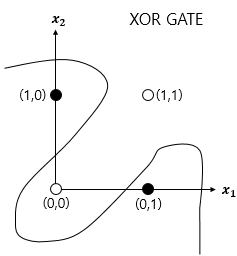

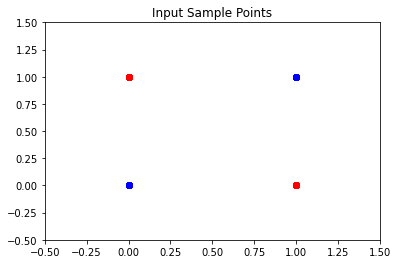

In [23]:
samples = 200 
sets = int(samples / 4)
data = generateData(sets, "XOR")

plt.figure()
plt.title("Input Sample Points")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
for x in data:
    if x[3][0] == 1:
        plt.plot(x[0], x[1], 'or')
    else:
        plt.plot(x[0], x[1], 'ob')

In [24]:
N = 30      # number of neurons
D_inp = 3
D_out = 1
sim_time = samples
neuron_mode = nengo.LIF() 
model = nengo.Network('OR Network')

weights = np.random.rand(D_inp,D_out).transpose()    

with model:  
    def stim(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return [data[i][0], data[i][1], data[i][2]]
        return 0
       
    def stim_ans(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return data[i][3]
        return 0 
      
    #Define perceptron inputs
    stim = nengo.Node(output=stim, size_out=D_inp)
    stim_ans = nengo.Node(output=stim_ans, size_out=D_out)

    #Create neural ensembles
    input = nengo.Ensemble(N*D_inp, dimensions=D_inp, neuron_type=neuron_mode, label="input") 
    answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="answer")  
    correct_answer = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="correct_answer")
    
    #Provide inputs to the perceptron
    nengo.Connection(stim, input) 
    nengo.Connection(stim_ans, correct_answer)
    
    #Compute error for learning which gets inhibited
    error = nengo.Ensemble(N*D_out, dimensions=D_out, neuron_type=neuron_mode, label="error")
    nengo.Connection(answer, error, transform=1)
    nengo.Connection(correct_answer, error, transform=-1)
    
    #Specify the learning rule and the weight solver
    conn = nengo.Connection(input, answer, transform=weights, solver=nengo.solvers.LstsqL2(weights=True)) 
    conn.learning_rule_type={'my_pes': nengo.PES(1e-4)}
    
    #Provide error for learning
    error_conn = nengo.Connection(error, conn.learning_rule['my_pes'])

In [25]:
with model:
    input_p = nengo.Probe(input, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)
    correct_answer_p = nengo.Probe(correct_answer, synapse=0.1)
    error_p = nengo.Probe(error, synapse=0.1)

In [26]:
sim = nengo.Simulator(model)
sim.run(sim_time)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0.5, 1.0, 'Error for learning')

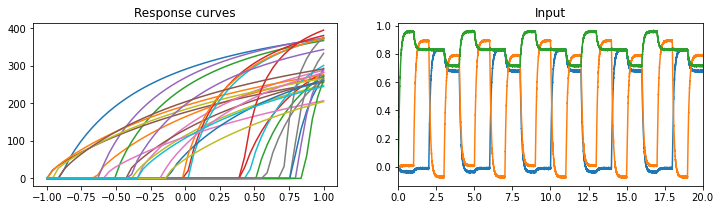

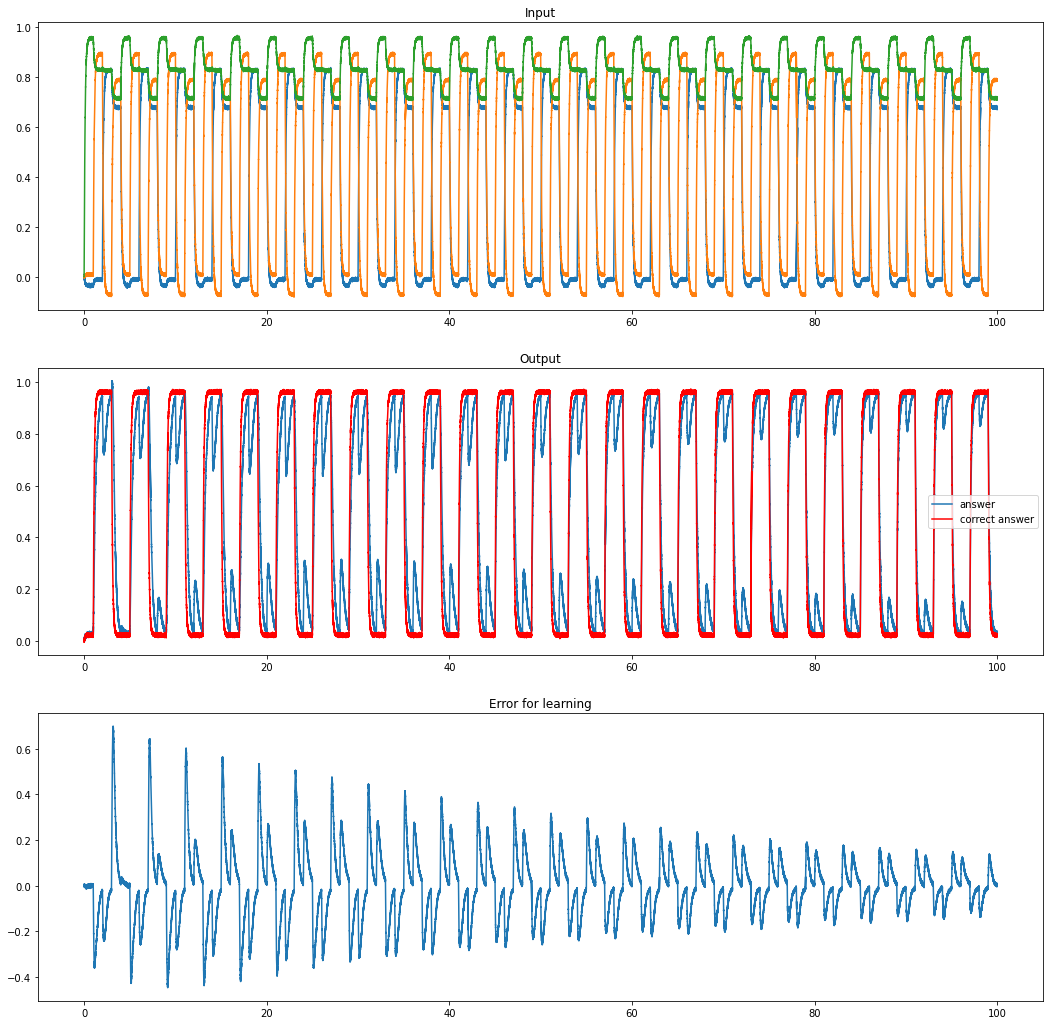

In [27]:
fig = plt.figure(figsize=(12, 3))
p0 = plt.subplot(1, 2, 1)
p0.plot(*response_curves(answer, sim))
p0.set_title("Response curves")

p1 = plt.subplot(1, 2, 2)
p1.plot(t, sim.data[input_p])
p1.set_title("Input")
p1.set_xlim(0,20)

fig = plt.figure(figsize=(18,18))

p0 = fig.add_subplot(3,1,1)
p0.plot(t, sim.data[input_p])
p0.set_title("Input")

p1 = fig.add_subplot(3,1,2)
p1.plot(t, sim.data[answer_p], label="answer")
p1.plot(t, sim.data[correct_answer_p], label="correct answer", color='r')
p1.set_title("Output")
p1.legend(loc='best');

p2 = fig.add_subplot(3,1,3)
p2.plot(t, sim.data[error_p])
p2.set_title("Error for learning")